In [7]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import csv
import os
from pandas import DataFrame, read_csv
from matplotlib import style
style.use('seaborn')
import matplotlib
from matplotlib import colors

In [8]:
import numpy as np
import pandas as pd

In [9]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func, desc
from sqlalchemy import func
%ls

 Volume in drive C is OS
 Volume Serial Number is 326A-D73C

 Directory of C:\Users\Josue\Desktop\UDEN201805DATA1\week11\HW

08/05/2018  09:28 PM    <DIR>          .
08/05/2018  09:28 PM    <DIR>          ..
08/05/2018  07:40 PM    <DIR>          .ipynb_checkpoints
08/01/2018  10:27 PM    <DIR>          Images
07/27/2018  09:25 PM             5,165 README.md
07/30/2018  08:38 PM    <DIR>          Resources
08/05/2018  09:28 PM           254,778 sqlalchemy hw.ipynb
08/01/2018  11:35 PM               958 tic tac toe.ipynb
08/05/2018  08:44 PM            10,035 Untitled.ipynb
               4 File(s)        270,936 bytes
               5 Dir(s)  914,138,128,384 bytes free


In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
conn = engine.connect()
inspector = inspect(engine)

In [13]:
engine.table_names()

['measurement', 'station']

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
Station.__table__

Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)

In [18]:
Measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [20]:
#reading in csv files
hawaii_station_df = pd.read_csv(r"\Users\Josue\Desktop\\hawaii_stations.csv")


In [21]:
hawaii_station_df.head(20)

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [22]:
#reading in csv files
hawaii_measurement_df = pd.read_csv(r"\Users\Josue\Desktop\\hawaii_measurements.csv")

In [23]:
hawaii_measurement_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [24]:
#replace all Nans with 0
hawaii_measurement_df = hawaii_measurement_df.replace(np.nan, 0)

In [25]:
#clean df...no nans
hawaii_measurement_df.head(10)

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,0.00,73
5,USC00519397,2010-01-07,0.06,70
6,USC00519397,2010-01-08,0.00,64
7,USC00519397,2010-01-09,0.00,68
8,USC00519397,2010-01-10,0.00,73
9,USC00519397,2010-01-11,0.01,64


In [26]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results*

# Calculate the date 1 year ago from today*

# Perform a query to retrieve the data and precipitation scores*

# Save the query results as a Pandas DataFrame and set the index to the date column*

# Sort the dataframe by date*

# Use Pandas Plotting with Matplotlib to plot the data*

# Rotate the xticks for the dates*


In [28]:
# Calculate the date 1 year ago from today
# to get the last 12 months of data, last date - 365
last_year = dt.date(2018, 7, 29) - dt.timedelta(days=365)
print(last_year)

2017-07-29


In [29]:
# query to pull the last 12 months of precipitation data
preci_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

In [30]:
# Load the data from the query into a dataframe
preci_df = pd.DataFrame(preci_data)
preci_df.head()

,date,prcp
0,2017-07-30,0.0
1,2017-07-30,0.0
2,2017-07-30,0.0
3,2017-07-30,0.0
4,2017-07-30,0.3


In [31]:
# Sort the dataframe by date
preci_df.set_index('date').head()


,prcp
date,
2017-07-30,0.0
2017-07-30,0.0
2017-07-30,0.0
2017-07-30,0.0
2017-07-30,0.3


<IPython.core.display.Javascript object>


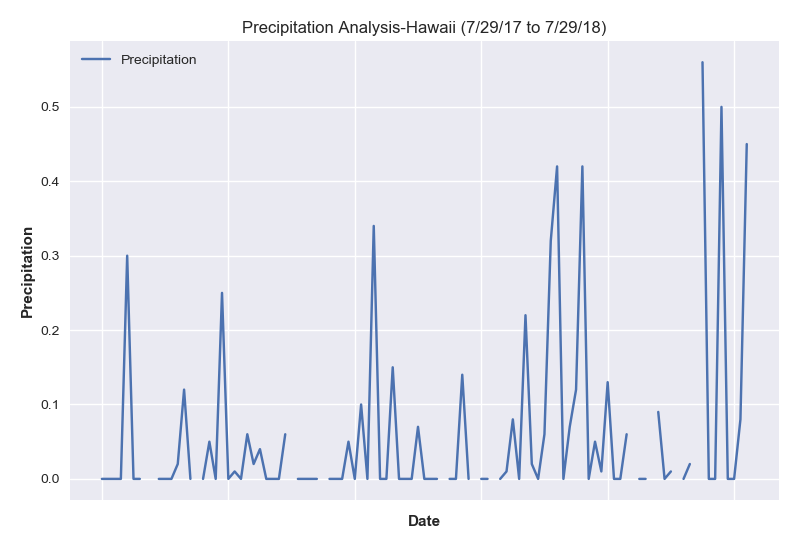

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
# plot the dataframe
preci_df.plot('date', 'prcp')
plt.xlabel("Date", weight = 'bold')
plt.ylabel('Precipitation', weight='bold')
plt.title("Precipitation Analysis-Hawaii (7/29/17 to 7/29/18)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
preci_df.describe()


,prcp
count,91.000000
mean,0.060220
std,0.123008
min,0.000000
25%,0.000000
50%,0.000000
75%,0.060000
max,0.560000


In [35]:
# How many stations are available in this dataset?
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [36]:
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [37]:
# What are the most active stations?
# List the stations and the counts in descending order.
#tobs temperature observations
locations = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station==Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [38]:
locations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2017-07-29", Measurement.date <="2018-07-29").\
all()

In [40]:
len(waihee_tobs)

12

In [41]:

print(waihee_tobs[0][0])

82.0


In [42]:
temperatures = [temp[0] for temp in waihee_tobs]

<IPython.core.display.Javascript object>


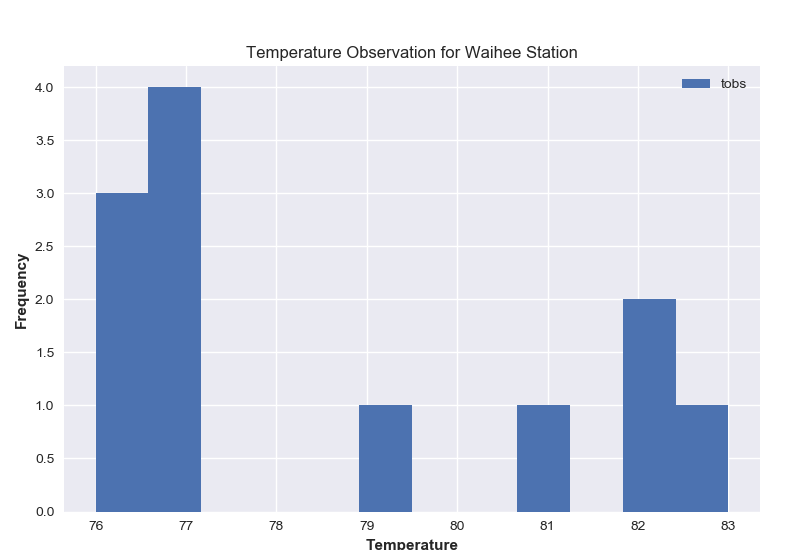

In [43]:
plt.hist(temperatures, bins=12)
plt.title("Temperature Observation for Waihee Station")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)

In [44]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2007-02-28', '2012-03-05'))

[(56.0, 72.31346505063922, 87.0)]


In [45]:
def calc_temps(start, end):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    lowest_temp = min(temperatures)
    highest_temp = max(temperatures)
    

    plt.figure(figsize=(3,5))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='blue')
    plt.ylabel("Temperature", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.show()

In [46]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


<IPython.core.display.Javascript object>


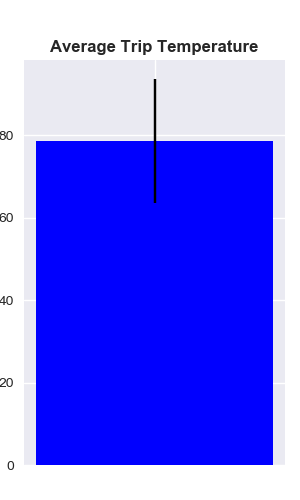

In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps(start="2017-08-07", end="2017-08-20")